# Filters in pycoco

---------------------

## Introduction

This notebook aims to serve as a short tutorial (along with the others in this directory). In this notebook, the tools for adding/testing/plotting filters in `pycoco`, as a companion to the `c` code `CoCo`


In [2]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os

import pycoco as pcc

reload(pcc) ## FOR DEV


<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.pyc'>

## Using `FilterClass`

### `FilterClass` Methods and Variables

Filters in **`pycoco`** are handled using a **`FilterClass()`**, which has the methods:

**`FilterClass.__init__()`**

**`FilterClass.read_filter_file()`** 

**`FilterClass.calculate_effective_wavelength()`**

**`FilterClass.calculate_edges()`** 

**`FilterClass.plot()`**

**`FilterClass.resample_response()`**

**`FilterClass.calculate_plot_colour()`**


and variables:

**`FilterClass._wavelength_units`**

**`FilterClass._filter_file_path`**

**`FilterClass._upper_edge`**

**`FilterClass._lower_edge`**

**`FilterClass.lambda_effective`**

**`FilterClass.wavelength`**

**`FilterClass.throughput`**


### Loading a Filter

We can use **`pcc.load_filter()`** to intialise a FilterClass instance and load in a response function given a valid path to that filter.
**`pcc.load_filter()`** is essentially a wrapper for the class methods: **read_filter_file()**, **calculate_effective_wavelength()** and **calculate_plot_colour()**.

In [4]:
verbose = False  

filter_filename = "BessellB.dat"
path_to_filter = os.path.join(os.path.abspath(pcc._default_filter_dir_path), filter_filename)

if verbose: print("Path to the filter: ", path_to_filter)

In [5]:
B = pcc.load_filter(path = path_to_filter)

In [7]:
print(pcc.hex["B"])
print(pcc.hex["BessellB"])

#0000ff
#0000ff


Now we can check that everything has been loaded in automatically.

In [8]:
B.__dict__

{'_cumulative_throughput': array([ 0.        ,  0.00312761,  0.01709758,  0.07620934,  0.1721226 ,
         0.27408257,  0.37833611,  0.48029608,  0.57777314,  0.66670142,
         0.74384904,  0.81057131,  0.86645121,  0.91065471,  0.94453711,
         0.9690367 ,  0.98467473,  0.99457882,  0.99906172,  1.        ,  1.        ]),
 '_cumulative_throughput_spline': <scipy.interpolate.interpolate.interp1d at 0x10707c208>,
 '_filter_file_path': '/Users/berto/Code/CoCo/data/filters/BessellB.dat',
 '_frequency_units': Unit("Hz"),
 '_lower_edge': array(3784.9850746268658),
 '_plot_colour': '#0000ff',
 '_upper_edge': array(5203.284210526318),
 '_wavelength_units': Unit("Angstrom"),
 'filter_name': 'BessellB',
 'lambda_effective': <Quantity 4354.410549343705 Angstrom>,
 'throughput': array([ 0.   ,  0.03 ,  0.134,  0.567,  0.92 ,  0.978,  1.   ,  0.978,
         0.935,  0.853,  0.74 ,  0.64 ,  0.536,  0.424,  0.325,  0.235,
         0.15 ,  0.095,  0.043,  0.009,  0.   ]),
 'wavelength': array

Looks good! But we can always check by plotting.

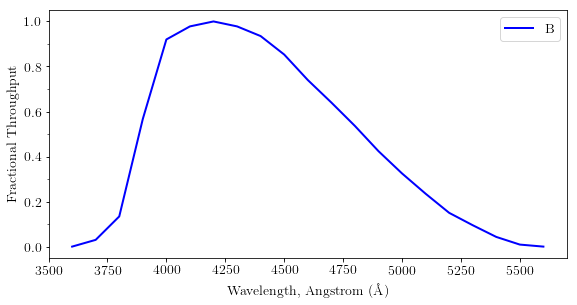

In [166]:
B.plot()

If the effective wavelength of the filter has been calculated, then a colour can be picked from a colourmap. This will come in handy for datasets with more than a few filters. This can be done using **`FilterClass.calculate_plot_colour(...)`**

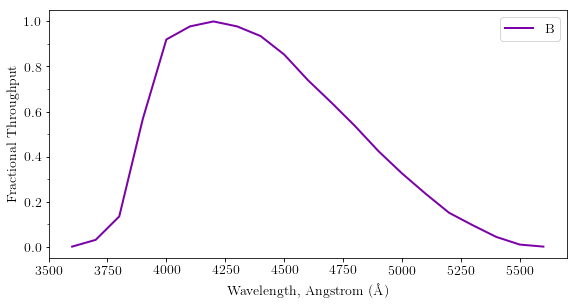

In [167]:
B.calculate_plot_colour()
B.plot()

You can also show the edges of the filter by passing `show_lims = True`. This uses the edges as defined by **`FilterClass.calculate_edges()`** and stored in **`FilterClass._upper_edge`** and
**`FilterClass._lower_edge`**

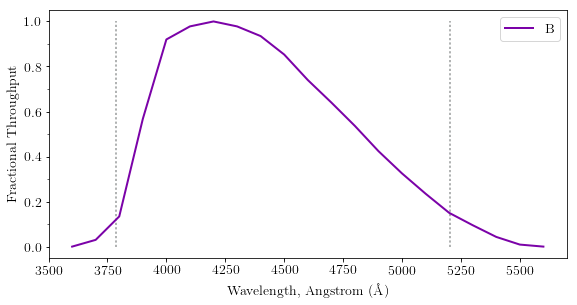

In [168]:
B.plot(show_lims = True)

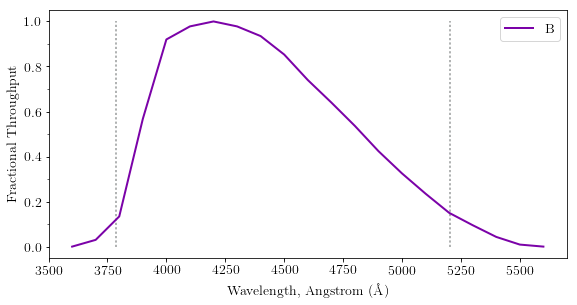

In [169]:
B.plot(show_lims = True)

As well as dealing with the filters in wavelength-space, frequency conversions can also be done. The calculation for effective F_nu especially is useful for making flux unit conversions  

In [170]:
B.calculate_frequency()
B.frequency_u

<Quantity [  8.32756828e+14,  8.10249886e+14,  7.88927521e+14,
             7.68698610e+14,  7.49481145e+14,  7.31201117e+14,
             7.13791567e+14,  6.97191763e+14,  6.81346495e+14,
             6.66205462e+14,  6.51722735e+14,  6.37856294e+14,
             6.24567621e+14,  6.11821343e+14,  5.99584916e+14,
             5.87828349e+14,  5.76523958e+14,  5.65646147e+14,
             5.55171219e+14,  5.45077196e+14,  5.35343675e+14] Hz>

In [171]:
B.calculate_effective_frequency()
B.nu_effective

<Quantity 699311552694397.1 Hz>

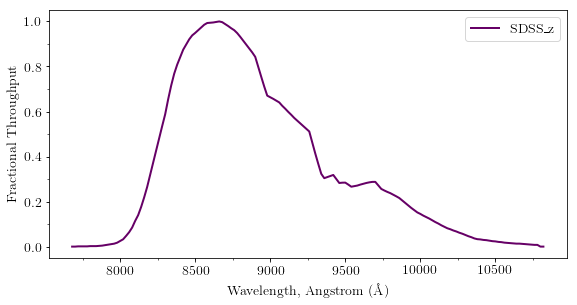

In [172]:
sdssz = pcc.load_filter(path = '/Users/berto/Code/CoCo/data/filters/SDSS_z.dat')
sdssz.plot()

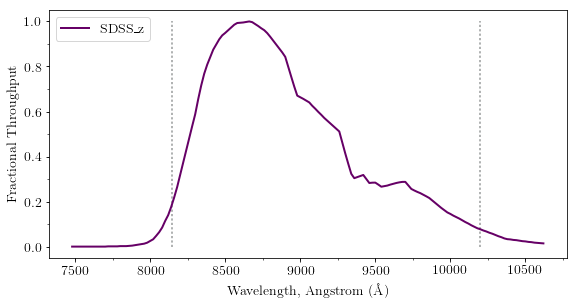

In [176]:
sdssz.resample_response(new_wavelength=sdssz.wavelength - 100)
sdssz.plot(show_lims = True)

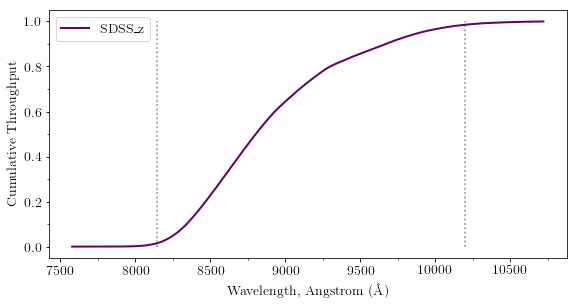

In [175]:
sdssz.plot(cumulative=True, show_lims = True)